# Task 1: Mushroom data analysis and classification
In this task, we use four algorithms (decision tree, random forest, KNN, and a multi-layer perceptron) to determine the edibility of a mushroom using the UCI mushroom dataset (a binary classification).

In [1]:
import warnings
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,  fcluster
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter

print("Done importing for task 1")

# Task 2

#!pip install spacy
#!python -m spacy download nb_core_news_sm
#!python -m spacy download nb_core_news_md
#!python -m spacy download nb_core_news_lg
import spacy
from time import time
from IPython.display import clear_output
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
# !pip install seaborn
from seaborn import heatmap
from sklearn.metrics import f1_score
import json

print("Done importing for task 2")

#Task 3
import sys
from matplotlib.lines import Line2D
from keras.callbacks import TensorBoard
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from keras.metrics import Precision, Recall
from keras.utils import plot_model
from IPython.display import display
from ipywidgets import Button, FileUpload, Output, VBox
from PIL import Image, ImageOps
import io
import itertools
import os
import shutil

print("Done importing for task 3")


/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Done importing for task 1
Done importing for task 2
Done importing for task 3


We declare a variable with an arbitrary integer value as our random state. 

In [2]:
SEED = 42

We give the columns in the dataset names based on the UCI page about the dataset [1].

As we can see, our dataset has 24 columns representing features of mushrooms including edibility (our target feature). Each row is a single mushroom sample. Each cell contains a single character representing a feature value.

In [3]:
features = ['Edible', 'Cap Shape', 'Cap Surface', 'Cap Color', 'Bruises?', 'Odor', 'Gill Attachment','Gill Spacing', 'Gill Size', 'Gill Color', 'Stalk Shape', 'Stalk Root','Stalk Surface Above Ring','Stalk Surface Below Ring', 'Stalk Color Above Ring', 'Stalk Color Below Ring','Veil Type','Veil Color', 'Ring Number', 'Ring Type','Spore Print Color','Population','Habitat']

df = pd.read_csv("agaricus-lepiota.csv", header=None, names=features)
df.head()

,Edible,Cap Shape,Cap Surface,Cap Color,Bruises?,Odor,Gill Attachment,Gill Spacing,Gill Size,Gill Color,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Ring Number,Ring Type,Spore Print Color,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


We print the amount of unique columns in our dataset and look at the first five rows. From this, we see there are some multivalued features, some binary features, and one constant feature. We can safely remove the constant feature, as it adds no information. We will deal with the binary values later.

In [4]:
df.nunique()

Edible                       2
Cap Shape                    6
Cap Surface                  4
Cap Color                   10
Bruises?                     2
Odor                         9
Gill Attachment              2
Gill Spacing                 2
Gill Size                    2
Gill Color                  12
Stalk Shape                  2
Stalk Root                   5
Stalk Surface Above Ring     4
Stalk Surface Below Ring     4
Stalk Color Above Ring       9
Stalk Color Below Ring       9
Veil Type                    1
Veil Color                   4
Ring Number                  3
Ring Type                    5
Spore Print Color            9
Population                   6
Habitat                      7
dtype: int64

In [5]:
df = df.drop("Veil Type", axis=1) # Remove constant value

Before we are able to use sklearn on our data to train an algorithm, we will have to transform our categorical data to numerical values. pandas.get_dummies() is a way of doing this, and creates one-hot features of each trait.

Calling get_dummies increases the dimensionality of the data considerably, but since this data is nominal (according to the providers of the data), it makes sense to separate them. Although there are features in the dataset that seem to be ordinal, these are actually nominal values in practice (for example, a ring number of 0 and a ring number of 1 should mean completely different things.) We have therefore chosen to one-hot encode all features.

In [6]:
prev = df.columns
df = pd.get_dummies(df)
print(f"Went from {len(prev)} to {len(df.columns)} columns")

Went from 22 to 118 columns


We can remove one of each pair of binary features, since they are complementary.

In [7]:
# Remove one-hot features originating from columns with with binary values
# (which one of the two is pretty much inconsequential)
df = df.drop("Bruises?_f", axis=1)
df = df.drop("Gill Attachment_a", axis=1)
df = df.drop("Gill Size_b", axis=1)
df = df.drop("Gill Spacing_c", axis=1)
df = df.drop("Stalk Shape_t", axis=1)
df = df.drop("Edible_e", axis=1)
print(f"Total features: {len(df.columns)}")

Total features: 112


Before splitting the data, we shuffle it ensure randomness. This is especially important for when we use cross validation later in our grid search. If the data is somehow sorted when we use cross validation, we might end up with some unbalanced folds. 

In [8]:
df = df.sample(frac=1, random_state=SEED).reset_index(drop=True) # Shuffle rows

Now, it is time to split the data into our features (x) and our target variable (y). 

In [9]:
y = df["Edible_p"]
x = df.drop(["Edible_p"], axis=1)

## 1 b)

To compare the importance of each feature, we used a random forest classifier. There are several different methods we could have used, however we thought that using a decision tree would create human-understandable decisions.. We also wanted to use a random forest, rather than a single tree, as this makes our importance ratings less influenced by the exact choices of features a single decition tree makes, and rather finds general trends.

<ipython-input-10-1743a6e57777>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([feature_lookup.get(feature, feature) for feature in sorted_features], rotation=45)


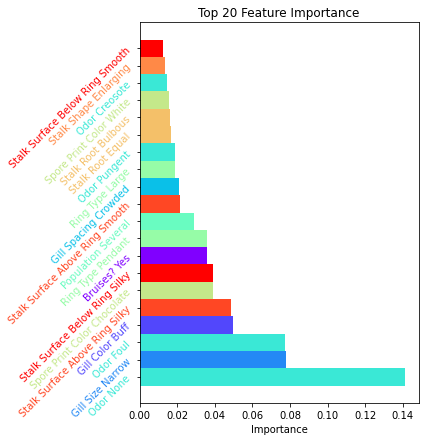

In [10]:
feature_lookup = {'Edible_p':'Poisonous','Cap Shape_b':'Cap Shape Bell', 'Cap Shape_c':'Cap Shape Conical', 'Cap Shape_x':'Cap Shape Convex',   'Cap Shape_f':'Cap Shape Flat','Cap Shape_k':'Cap Shape Knobbed', 'Cap Shape_s':'Cap Shape Sunken', 'Cap Surface_f':'Cap Surface Fibrous', 'Cap Surface_g':'Cap Surface Grooves','Cap Surface_y':'Cap Surface Scaly', 'Cap Surface_s':'Cap Surface Smooth', 'Cap Color_n':'Cap Color Brown', 'Cap Color_b':'Cap Color Buff', 'Cap Color_c':'Cap Color Cinnamon', 'Cap Color_g':'Cap Color Gray', 'Cap Color_r':'Cap Color Green', 'Cap Color_p':'Cap Color Pink','Cap Color_u':'Cap Color Purple','Cap Color_e':'Cap Color Red', 'Cap Color_w':'Cap Color White', 'Cap Color_y':'Cap Color Yellow', 'Bruises?_t':'Bruises? Yes', 'Odor_a':'Odor Almond', 'Odor_l':'Odor Anise', 'Odor_c':'Odor Creosote', 'Odor_y':'Odor Fishy', 'Odor_f':'Odor Foul', 'Odor_m':'Odor Musty', 'Odor_n':'Odor None', 'Odor_p':'Odor Pungent','Odor_s':'Odor Spicy', 'Gill Attachment_a':'Gill Attachment Attached', 'Gill Attachment_d':'Gill Attachment Descending', 'Gill Attachment_f':'Gill Attachment Free', 'Gill Attachment_n':'Gill Attachment Notched','Gill Spacing_c':'Gill Spacing Close', 'Gill Spacing_w':'Gill Spacing Crowded', 'Gill Spacing_d':'Gill Spacing Distant', 'Gill Size_n':'Gill Size Narrow', 'Gill Color_k':'Gill Color Black', 'Gill Color_n':'Gill Color Brown', 'Gill Color_b':'Gill Color Buff', 'Gill Color_h':'Gill Color Chocolate', 'Gill Color_g':'Gill Color Gray', 'Gill Color_r':'Gill Color Green', 'Gill Color_o':'Gill Color Orange', 'Gill Color_p':'Gill Color Pink','Gill Color_u':'Gill Color Purple','Gill Color_e':'Gill Color Red', 'Gill Color_w':'Gill Color White','Gill Color_y':'Gill Color Yellow','Stalk Shape_e':'Stalk Shape Enlarging', 'Stalk Root_b':'Stalk Root Bulbous', 'Stalk Root_c':'Stalk Root Club', 'Stalk Root_u':'Stalk Root Cup', 'Stalk Root_e':'Stalk Root Equal', 'Stalk Root_z':'Stalk Root Rhizomorphs', 'Stalk Root_r':'Stalk Root Rooted', 'Stalk Root_?':'Stalk Root Missing', 'Stalk Root_b':'Stalk Root Bulbous','Stalk Surface Above Ring_f':'Stalk Surface Above Ring Fibrous','Stalk Surface Above Ring_y':'Stalk Surface Above Ring Scaly', 'Stalk Surface Above Ring_k':'Stalk Surface Above Ring Silky', 'Stalk Surface Above Ring_s':'Stalk Surface Above Ring Smooth', 'Stalk Surface Below Ring_f':'Stalk Surface Below Ring Fibrous','Stalk Surface Below Ring_y':'Stalk Surface Below Ring Scaly', 'Stalk Surface Below Ring_k':'Stalk Surface Below Ring Silky', 'Stalk Surface Below Ring_s':'Stalk Surface Below Ring Smooth', 'Stalk Color Above Ring_n':'Stalk Color Above Ring Brown', 'Stalk Color Above Ring_b':'Stalk Color Above Ring Buff', 'Stalk Color Above Ring_c':'Stalk Color Above Ring Cinnamon', 'Stalk Color Above Ring_g':'Stalk Color Above Ring Gray','Stalk Color Above Ring_o':'Stalk Color Above Ring Orange', 'Stalk Color Above Ring_p':'Stalk Color Above Ring Pink', 'Stalk Color Above Ring_e':'Stalk Color Above Ring Red', 'Stalk Color Above Ring_w':'Stalk Color Above Ring White',  'Stalk Color Above Ring_y':'Stalk Color Above Ring Yellow','Stalk Color Below Ring_n':'Stalk Color Below Ring Brown', 'Stalk Color Below Ring_b':'Stalk Color Below Ring Buff', 'Stalk Color Below Ring_c':'Stalk Color Below Ring Cinnamon', 'Stalk Color Below Ring_g':'Stalk Color Below Ring Gray', 'Stalk Color Below Ring_o':'Stalk Color Below Ring Orange', 'Stalk Color Below Ring_p':'Stalk Color Below Ring Pink', 'Stalk Color Below Ring_e':'Stalk Color Below Ring Red', 'Stalk Color Below Ring_w':'Stalk Color Below Ring White', 'Stalk Color Below Ring_y':'Stalk Color Below Ring Yellow', 'Veil Color_n':'Veil Color Brown', 'Veil Color_o':'Veil Color Orange','Veil Color_w':'Veil Color White', 'Veil Color_y':'Veil Color Yellow','Ring Number_n':'Ring Number None', 'Ring Number_o':'Ring Number One','Ring Number_t':'Ring Number Two', 'Ring Type_c':'Ring Type Cobwebby','Ring Type_e':'Ring Type Evanescent', 'Ring Type_f':'Ring Type Flaring','Ring Type_l':'Ring Type Large','Ring Type_n':'Ring Type None', 'Ring Type_p':'Ring Type Pendant','Ring Type_s':'Ring Type Sheathing', 'Ring Type_z':'Ring Type Zone','Spore Print Color_k':'Spore Print Color Black','Spore Print Color_n':'Spore Print Color Brown','Spore Print Color_b':'Spore Print Color Buff','Spore Print Color_h':'Spore Print Color Chocolate', 'Spore Print Color_r':'Spore Print Color Green','Spore Print Color_o':'Spore Print Color Orange','Spore Print Color_u':'Spore Print Color Purple','Spore Print Color_w':'Spore Print Color White','Spore Print Color_y':'Spore Print Color Yellow','Population_a':'Population Abundant','Population_c':'Population Clustered', 'Population_n':'Population Numerous','Population_s':'Population Scattered','Population_v':'Population Several','Population_y':'Population Solitary', 'Habitat_g':'Habitat Grasses', 'Habitat_l':'Habitat Leaves', 'Habitat_m':'Habitat Meadows', 'Habitat_p':'Habitat Paths', 'Habitat_u':'Habitat Urban', 'Habitat_w':'Habitat Waste', 'Habitat_d':'Habitat Woods',
} # From the UCI dataset page [1]
top_x_features = 20

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, random_state=SEED)
model.fit(x, y)

# Get the feature importance
importance = model.feature_importances_
feature_names = x.columns

# Sort the features by absolute importance
sorted_idx = abs(importance).argsort()[::-1]
sorted_features = feature_names[sorted_idx][:top_x_features]  # Limit to top 20 features
sorted_importance = importance[sorted_idx][:top_x_features]  # Limit to top 20 importance values

# Create a mapping between one-hot encoded feature names and their corresponding categories
feature_to_category = {feature: feature.split('_')[0] for feature in sorted_features}

# Assign colors to categories
unique_categories = sorted(set(feature_to_category.values()))
colors = cm.rainbow(np.linspace(0, 1, len(unique_categories)))
category_to_color = {category: color for category, color in zip(unique_categories, colors)}

# Plot a horizontal bar chart of feature importances with absolute values, thicker bars, and color-coded categories
fig, ax = plt.subplots(figsize=(5, 7))
for feature, imp in zip(sorted_features, abs(sorted_importance)):
    color = category_to_color[feature_to_category[feature]]
    #if feature in feature_lookup:  # Check if the feature exists in the feature_lookup dictionary
    ax.barh(feature_lookup[feature], imp, height=1, color=color)

ax.set_title("Top " + str(top_x_features) + " Feature Importance")
ax.set_xlabel("Importance")

# Update the y-axis labels with the real feature names and colors
ax.set_yticklabels([feature_lookup.get(feature, feature) for feature in sorted_features], rotation=45)
for tick_label, original_label in zip(ax.get_yticklabels(), sorted_features):
    category = feature_to_category.get(original_label, None)
    if category:
        tick_label.set_color(category_to_color[category])

plt.show()

It is clear that Odor None is the most important feature. However the graph also shows that other features are also important. This is not a case where a few very important features are critical for the decision process.

To better understand the shape of our features, we'll use T-SNE to visualize the data.

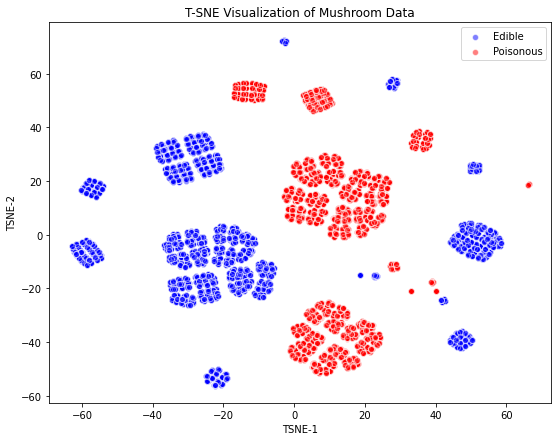

In [11]:
#create model
tsne_model = TSNE(learning_rate = 100)

#fit model
X_tsne = tsne_model.fit_transform(x)
plt.figure(figsize=(9, 7))
plt.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], color="blue", edgecolors='white', alpha=0.5, label="Edible")
plt.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], color="red", edgecolors='white', alpha=0.5, label="Poisonous")
plt.legend()
plt.title("T-SNE Visualization of Mushroom Data")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.show()

As the T-SNE plot shows, distinct clusters can be found in the data. These clusters may correspond to actual mushroom species, although the dataset does not include species information. We can also see that there is no overlap between edible and poisonous mushrooms, which may imply that we should be able to seperate the poisonous and edible mushrooms.

## 1 a)

Now it is time to train our models. We are splitting our data into 80% training data, 10% validation data (dev), and 10% test data (for a final performance evaluation). This is a common distribution between train, dev and test.

We decide to use these 4 differents models:

1) A decision tree was used because of its explainability, something that is valuable in this context.

2) A random forest was implemented to compare against the decision tree.

3) KNN was chosen after seeing the TSNE visualisation, which showed how seperable the data is.

4) A neural network was also chosen because of its general computing abilities.

To evaluate different hyperparameters we are using a grid search:

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=SEED)

# Hyperparameter grids
tree_params = {'max_depth': np.arange(1, 25)}
forest_params = {'max_depth': np.arange(1, 25)}
knn_params = {'n_neighbors': np.arange(1, 25, 2)}
network_params = {'hidden_layer_sizes': [(1), (3), (10), (3, 3), (10, 10), (30, 30)], 'max_iter': [5000]}

# Model instances
tree = DecisionTreeClassifier(random_state=SEED)
forest = RandomForestClassifier(random_state=SEED)
knn = KNeighborsClassifier()
network = MLPClassifier()

# GridSearchCV instances
tree_grid = GridSearchCV(tree, tree_params, cv=5)
forest_grid = GridSearchCV(forest, forest_params, cv=5)
knn_grid = GridSearchCV(knn, knn_params, cv=5)
network_grid = GridSearchCV(network, network_params, cv=5)

grids = [tree_grid, forest_grid, knn_grid, network_grid]
model_names = ['tree', 'forest', 'knn', 'network']

for grid, model_name in zip(grids, model_names):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)
        grid.fit(x_train, y_train)
    best_estimator = grid.best_estimator_
    prediction = best_estimator.predict(x_validate)
    accuracy = accuracy_score(y_validate, prediction)
    print(f"{model_name} {grid.best_params_} got a validation accuracy of {accuracy}")
    print()

tree {'max_depth': 7} got a validation accuracy of 1.0

forest {'max_depth': 8} got a validation accuracy of 1.0



/usr/lib/python3/dist-packages/sklearn/neighbors/_classification.py:187: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


knn {'n_neighbors': 1} got a validation accuracy of 1.0

network {'hidden_layer_sizes': 1, 'max_iter': 5000} got a validation accuracy of 1.0



The grid search was able to get an accuracy of 1 for each of the models.

Because of the high scores, we made a graph for the different parameters to investigate.

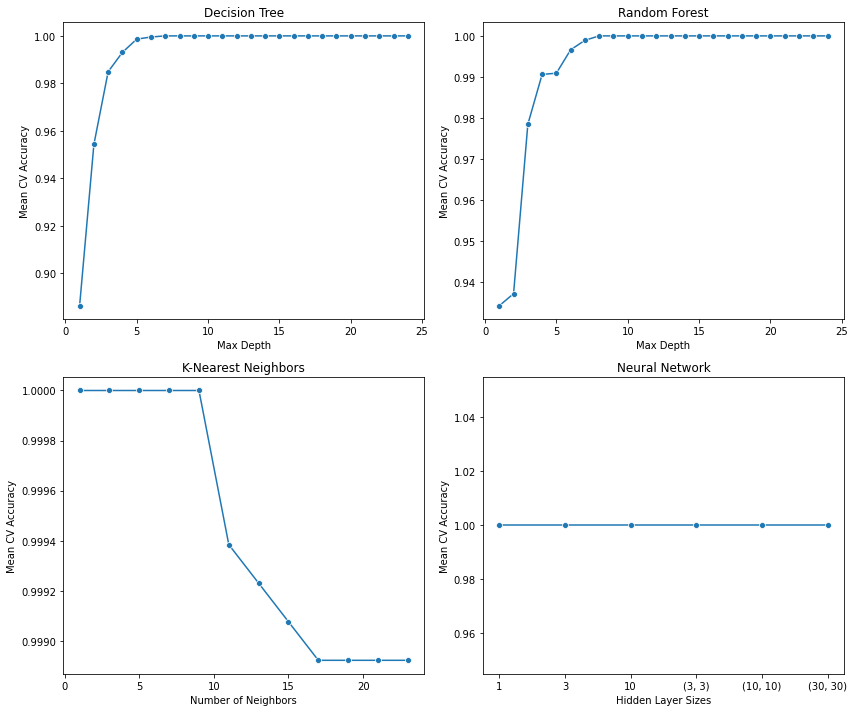

In [13]:
# Prepare the results for visualization
tree_results = tree_grid.cv_results_["mean_test_score"]
forest_results = forest_grid.cv_results_["mean_test_score"]
knn_results = knn_grid.cv_results_["mean_test_score"]
network_results = network_grid.cv_results_["mean_test_score"]

# Neural Network hidden_layer_sizes mapping
network_layer_mapping = {str(hls): [] for hls in network_params['hidden_layer_sizes']}

for hls, score in zip(network_grid.cv_results_["param_hidden_layer_sizes"], network_results):
    network_layer_mapping[str(hls)].append(score)

for k in network_layer_mapping:
    network_layer_mapping[k] = np.mean(network_layer_mapping[k])

network_x = list(network_layer_mapping.keys())
network_y = list(network_layer_mapping.values())

# Plot the results
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax = ax.flatten()

# Decision Tree and Random Forest
for i, (name, results, params) in enumerate(zip(["Decision Tree", "Random Forest"], [tree_results, forest_results], [tree_params, forest_params])):
    sns.lineplot(x=params["max_depth"], y=results, ax=ax[i], marker="o")
    ax[i].set_title(name)
    ax[i].set_xlabel("Max Depth")
    ax[i].set_ylabel("Mean CV Accuracy")
    ax

# K-Nearest Neighbors
sns.lineplot(x=knn_params["n_neighbors"], y=knn_results, ax=ax[2], marker="o")
ax[2].set_title("K-Nearest Neighbors")
ax[2].set_xlabel("Number of Neighbors")
ax[2].set_ylabel("Mean CV Accuracy")

# Neural Network
sns.lineplot(x=network_x, y=network_y, ax=ax[3], marker="o")
ax[3].set_title("Neural Network")
ax[3].set_xticks(range(len(network_params["hidden_layer_sizes"])))
ax[3].set_xticklabels([str(x) for x in network_params["hidden_layer_sizes"]])
ax[3].set_xlabel("Hidden Layer Sizes")
ax[3].set_ylabel("Mean CV Accuracy")

# Use ScalarFormatter to display y-axis labels in floating-point format
formatter = ScalarFormatter(useOffset=False, useMathText=False)
formatter.set_scientific(False)
ax[3].yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


Looking at the graphs, every single model has a large range of hyper parameters that gives us an accuracy of 1. The decision tree and random forest are able to perfectly fit the data with enough depth. The KNN has a small drop in accuracy with more neighbors. The neural network achieves a consistently high score regardless of size. We know from the TSNE that the data is easily dividible. Since we already have a top accuracy, improving (and evaluating) our models would become difficult.

One way to improve is to see how few features are needed to get a high accuracy. We trained a decision tree on a subset of the most important features in the training data. While we expect it to get a score of 1 with all features, how few does it really need?

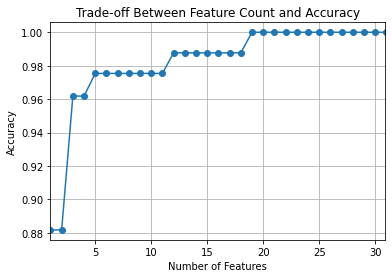

In [14]:
accuracies = []
for i in range(1, len(sorted_idx) + 1):
    selected_features = sorted_idx[:i]
    x_train_subset = x_train.iloc[:, selected_features]
    x_validate_subset = x_validate.iloc[:, selected_features]

    # Train a Decision Tree classifier
    low_feature_tree = DecisionTreeClassifier(max_depth=13, random_state=SEED)
    low_feature_tree.fit(x_train_subset, y_train)

    # Evaluate the performance on the test set
    y_pred = low_feature_tree.predict(x_validate_subset)
    accuracy = accuracy_score(y_validate, y_pred)

    accuracies.append(accuracy)

# Plot the trade-off between feature count and accuracy
plt.plot(range(1, len(sorted_idx) + 1), accuracies, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Trade-off Between Feature Count and Accuracy')
plt.xlim(1, 30.9)
plt.grid(True)

plt.show()

As we can see, even just one feature gets an accuracy of nearly 90%! With only three features, we have a 97% accuracy. With 19 features, we are able to predict all the mushrooms correctly.

Finally it is time to benchmark our models using our test data. We use hyperparameters that we know get an accuracy of 1 in the grid search.

In [15]:
tree = DecisionTreeClassifier(max_depth=13, random_state=SEED)
forest = RandomForestClassifier(max_depth=13, random_state=SEED)
knn = KNeighborsClassifier(n_neighbors=7)
network = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=5000)

models = [tree_grid, forest_grid, knn_grid, network_grid]
model_names = ['tree', 'forest', 'knn', 'network']

for model, model_name in zip(models, model_names):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)
        model.fit(x_train, y_train)
    y_pred = model.best_estimator_.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} got test accuracy of {accuracy}")
    print()


tree got test accuracy of 1.0

forest got test accuracy of 1.0



/usr/lib/python3/dist-packages/sklearn/neighbors/_classification.py:187: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


knn got test accuracy of 1.0

network got test accuracy of 1.0



As we can see, all models are able to get 1.0 accuracy.

## 1 c)


# Data Analysis and considerations

Since we got such a high accuracy, we were initially suspicious of the score. Firstly, we investigated if there could have been data leakage. We added random data points, and our accuracy decreased appropriately, suggesting data leakage was not the case.

We searched online and found others who got similar results. This gave us confidence that perhaps our results were not flawed, but the dataset was.

#### *What does an accuracy of 1 mean?*
With a score of 1 and a finite dataset, it is impossible to know whether our model will always give accurate predictions. With a test dataset of 8122 * 0.1 = 812 we can use Laplace's Rule of Succession [[2]](https://en.wikipedia.org/wiki/Rule_of_succession) to calculate an expected accuracy of 813/814 = (0.99877..) on a larger sample, which is less than 1. 
Secondly, an accuracy of 1 on this dataset tells us how well our model does on data that is generated in the same way that our dataset is. As we'll discuss, our dataset contains hypothetical samples from a limited source. In the real world, our model will be much less accurate.

#### *Would you trust it to classify a mushroom for you to eat?*
No.

#### *Why do you come to that conclusion?*
Our dataset consists of **hypothetical** samples of 23 mushrooms out of 31 contained in _The Audubon Society Field Guide to North American Mushrooms (1981)_, a book that in pages 500-525 analyze more specifically the species belonging to the agarucis and lepitosa family[1]. Although Agarucis and Lepitosa collectively consist of over 400 species, in reality there are thousands of species. Our model is trained and tested on this hypothetical dataset since it's took from an imaginary forest where there are mushrooms whose characteristics can be found also in the afromentioned famlies of real mushroom. Therefore, if we used this model to predict whether a random mushroom plucked from anywhere in the world is edible, it would very likely perform a lot worse. We would therfore not trust this or model to do that. However, if the mushroom in question is somehow generated in the same way as the mushrooms in our dataset, our odds are a lot better. Then we could rely on the 813/814 accuracy that we calculated. Still, this gives us a 1/814 chance of eating a poisonous mushroom. 


#### *Do you think the data set is sufficient to classify the mushroom as edible or poisonous?*
The dataset is sufficient to classify mushrooms generated in the same way to the hypothetical dataset. It might also be able to classify mushrooms of the same species as those the dataset. However, this is hard to verify without having tested any of our models on real mushrooms. For classifying a mushroom in general, i.e. of unknown species, it is not sufficient (as discussed above).

#### *Why do you believe your best performing model is the best model and  why do the other models perform worse?*
All our models recieved an accuracy of 1. We can therfore not really say that one model is better than the others. 

#### Sources:

[1] https://archive.ics.uci.edu/ml/datasets/mushroom
https://www.kaggle.com/code/aavigan/uci-mushroom-data

[2] https://en.wikipedia.org/wiki/Rule_of_succession

# Task 2

In this task, we use data from [norec_sentences](https://github.com/ltgoslo/norec_sentence.git) to train a model to predict the sentiment of Norwegian sentences. We used a gridsearch to test every combination of parameters and used its results for the preprocessing and training parameters of our model.

In our gridsearch, we searched over a pipepeline including 3 steps: lemmatizing, vectorizing, and model training. We used the resulting scores to choose how to lemmatize, what vectorizer to use, and what parameters to choose for our model. At the end we look at using data balancing to see if a less biased model will perform better.

Our data consists of 3 lists (train, dev, test) containing dictionaries. Each dictionary contains the text, label and ID of a single review. Below we load this data with Python.

In [16]:
data_3class = {}
for name in ["train", "dev", "test"]:
    with open(f"norec_sentence/3class/{name}.json") as infile:
        data_3class[name] = json.load(infile)

Since our training feature is the text of reviews and our target feature is the actual review rating, we split these two into separate sets of dictionaries, each containing their own train, dev and test sets. This makes it easier to handle our target and training data.

In [17]:
text = {'train': [x['text'] for x in data_3class['train']], 
        'dev' : [x['text'] for x in data_3class['dev']],
        'test':[x['text'] for x in data_3class['test']]}

labels ={'train':[x['label'] for x in data_3class['train']],
         'dev' : [x['label'] for x in data_3class['dev']],
         'test':[x['label'] for x in data_3class['test']]}

We have built a custom lemmatizer that can also remove stop words. Later, we will see what effect the removal of stop words has on model performance.

In [18]:
def lemmatizer(list_sentc:list, nlp:spacy, include_stop:bool)->list:
    """takes a list of sentences and returns a list of lemmatized sentences using the lemma_ 
    atribute from spacy, and list comprehention to filter out stopwords

    Args:
        list_sentc (list): a list of multiword sentences
        nlp (spacy): a spacy language model for lemmatization
        include_stop (bool): if true includes stopwords, if false removes stopwords
        
    Returns:
        list: lemmatized sentences
    """
    result = []
    for sentence in list_sentc:
        if nlp != None:
            doc = nlp(sentence.lower())
            if include_stop == False:
                result.append(' '.join([token.lemma_ for token in doc if token.is_stop is False]))
            else:
                result.append(' '.join([token.lemma_ for token in doc]))
        else:
            nlp = spacy.load('nb_core_news_sm')
            doc = nlp(sentence.lower())
            if include_stop == False:
                result.append(' '.join([token.text for token in doc if token.is_stop is False]))
            else:
                result.append(sentence)

    return result

We create a dictionary of several models so that we can easily test the performance of different model sizes.

In [19]:
nb_nlp = {'none': None, 'small': spacy.load('nb_core_news_sm'), 'medium': spacy.load('nb_core_news_md'), 'large':spacy.load('nb_core_news_lg')}

In [20]:
# Since scikitlearn's GridSearchCV automatically splits data in the
# cross validation prosess, we combine it here
text_comb = text['train'] + text['test'] + text['dev']
labels_comb = labels['train'] + labels['test'] + labels['dev']

In [21]:
# fits text to a vector and then makes document count matricees for each 
# combination for lemmatization model and if stopwords should be removed

vectorizer = CountVectorizer()
vectorizer.fit(text_comb)

grid = {}
for stop in [True, False]:
    for nlp in nb_nlp:
        sentences = lemmatizer(text_comb, nb_nlp[nlp], stop)

        grid[f'{stop}-{nlp}'] = vectorizer.transform(sentences).toarray()

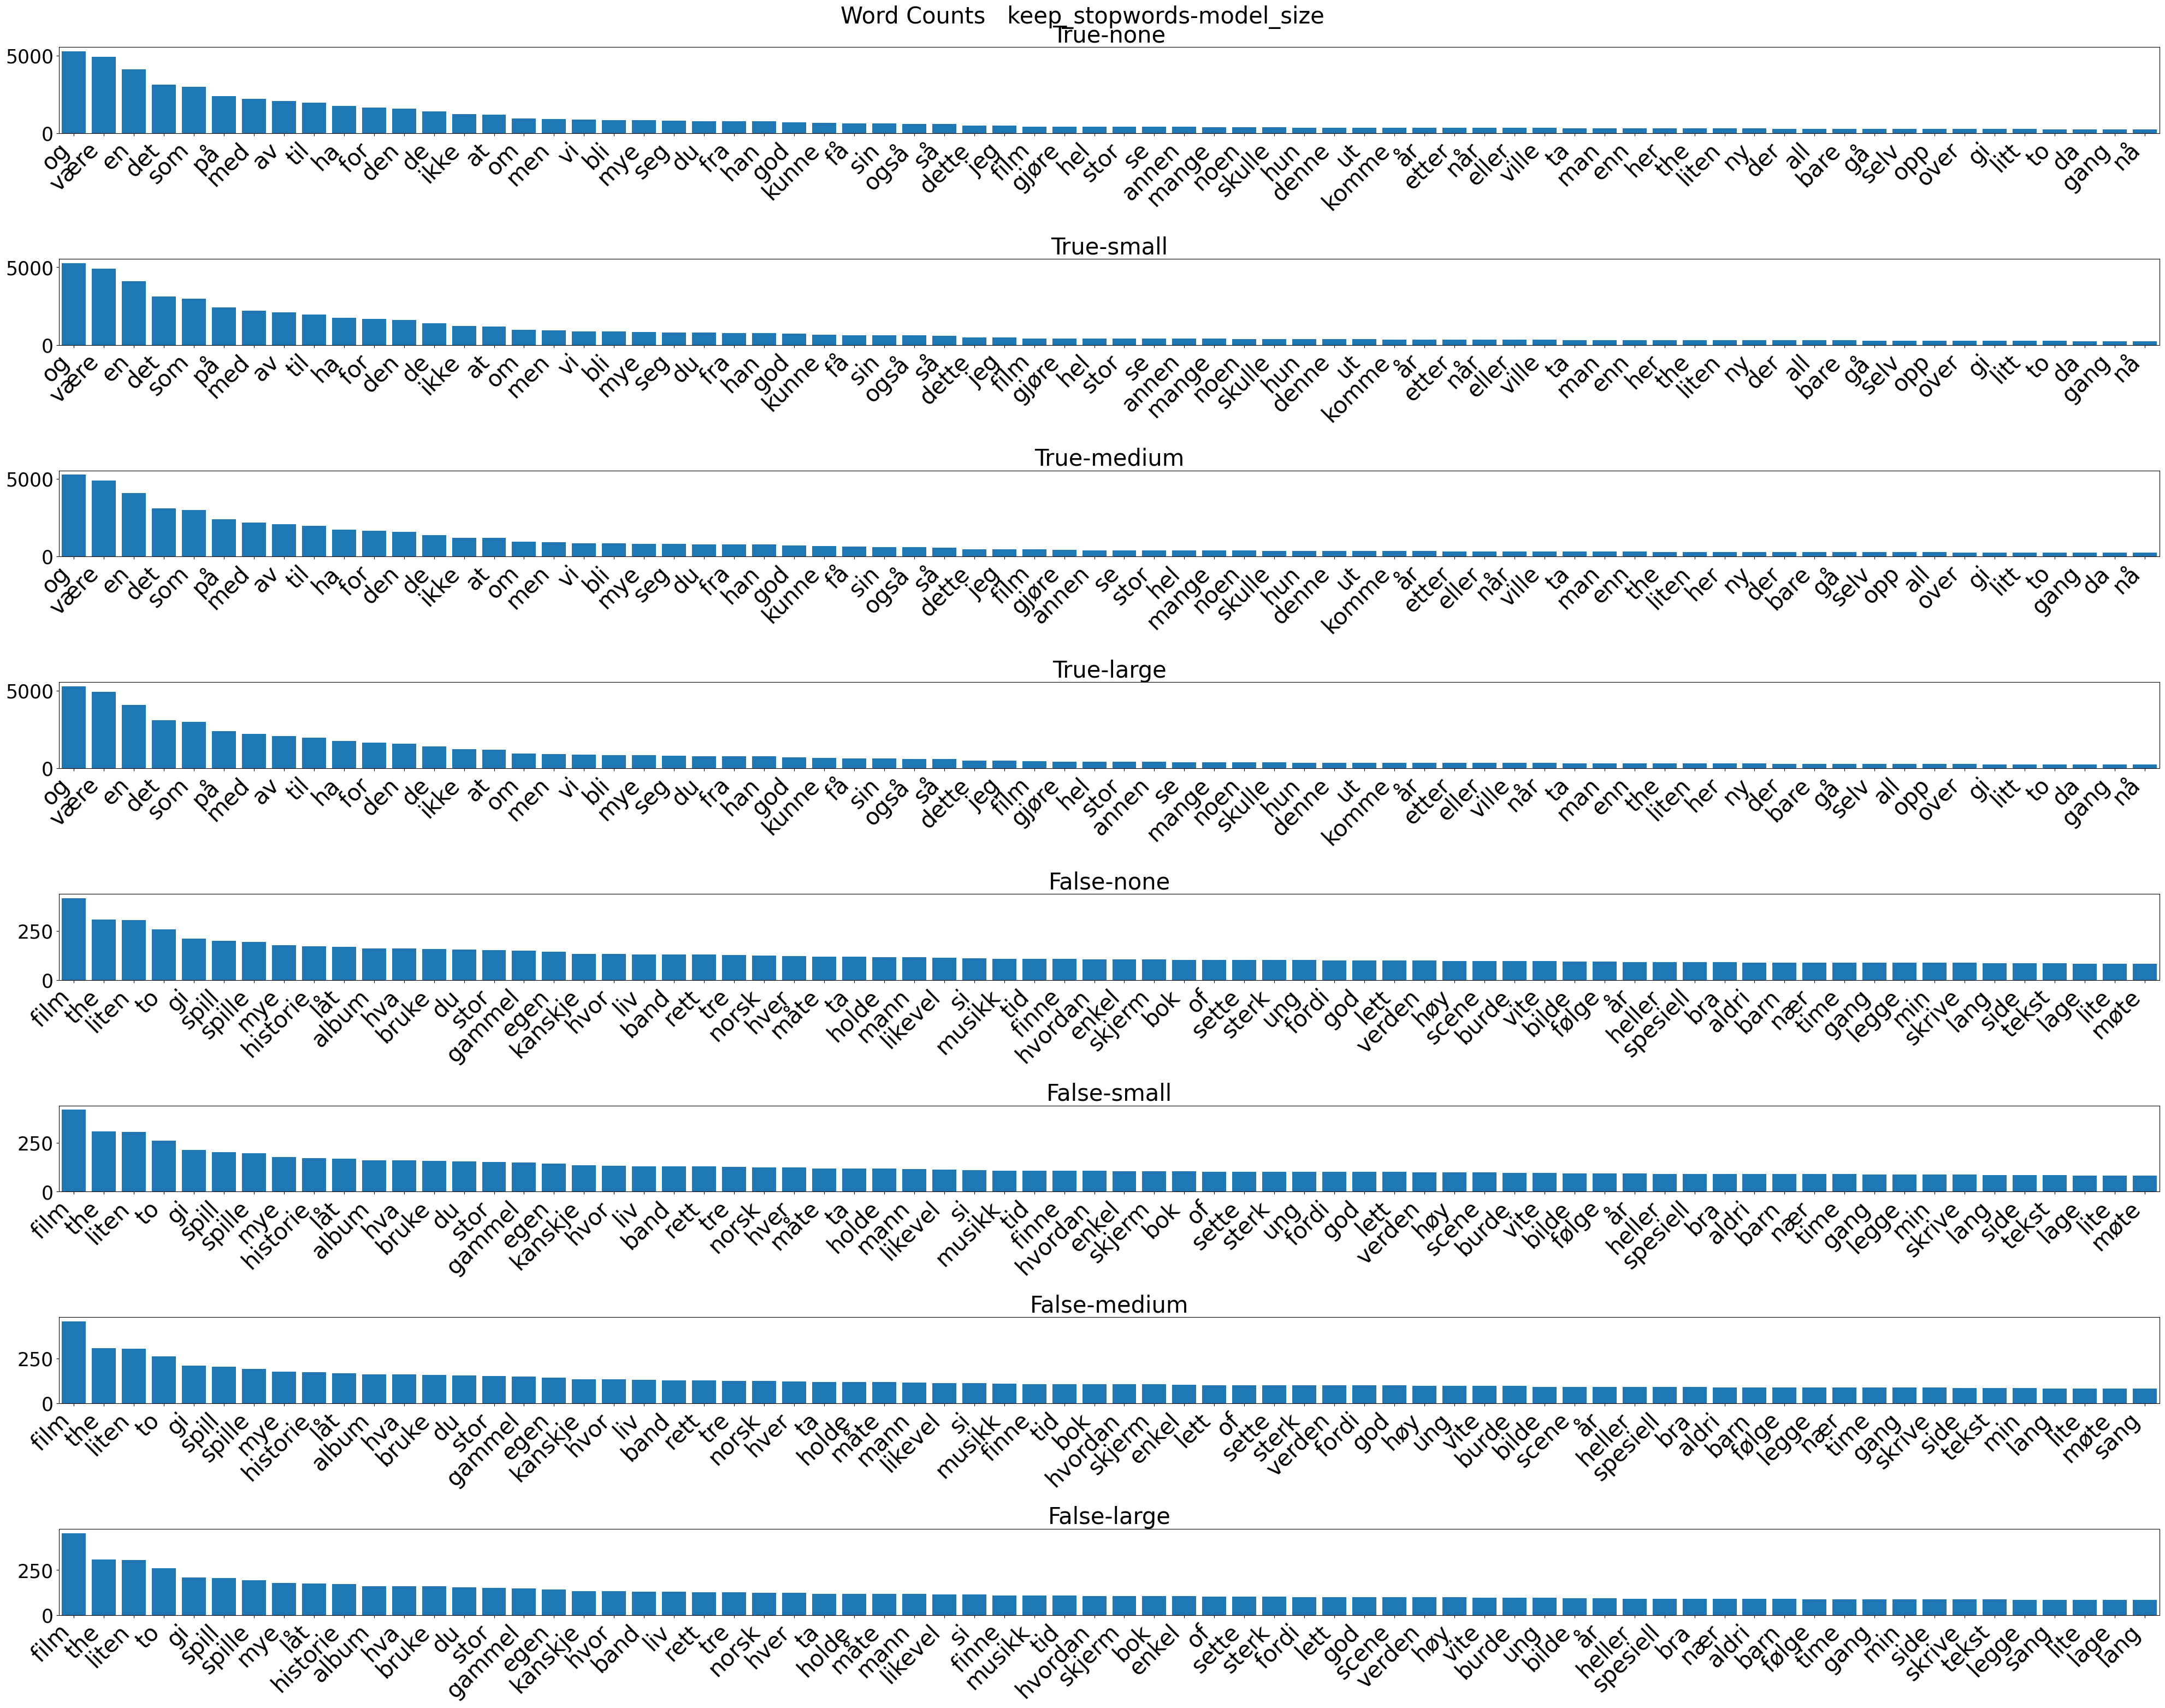

In [22]:
arrays = [x[1] for x in grid.items()]
keys = [x for x in grid.keys()]

# get the unique words that were counted
words = vectorizer.get_feature_names()

# create a 2x2 grid of plots
fig, axs = plt.subplots(8, 1, figsize=(40, 32))

# create a bar chart for each list of sentences in each subplot
for i, counts in enumerate(arrays):
    ax = axs[i]  # get the current subplot
    sorted_counts = sorted(zip(words, counts.sum(axis=0)), key=lambda x: -x[1])
    top_words = [w[0] for w in sorted_counts[:100]]
    top_counts = [w[1] for w in sorted_counts[:100]]
    ax.bar(top_words, top_counts)  # create a bar chart in the current subplot
    ax.set_title(keys[i], fontsize=22)  # set the title for the current subplot
    ax.tick_params(axis='x', rotation=45, labelsize=22)  # rotate the x-axis labels for readability
    ax.set_xlim([-0.5, 99.5])  # adjust the x-axis limit to include all the bars

    # set the font size of the tick labels on the y-axis
    ax.tick_params(axis='y', labelsize=16)
    for tick in ax.get_xticklabels():
        tick.set_horizontalalignment('right')  # align the labels to the right
        tick.set_x(-0.25)  # shift the labels to the left by 0.25 units


# remove the unused subplot
if len(arrays) < 4:
    axs[-1, -1].axis('off')

# add a global title and show the plot
fig.suptitle('Word Counts\nkeep_stopwords-model_size', fontsize=22)
fig.subplots_adjust(top=0.9)
fig.tight_layout(pad=2.0)
plt.show()

In the Graphs over we se that Lemmatization increases the number of most common words, and stopwordremoval results in some of the most common words to be removed. As we will see later the stopword removal actually increases performance AND makes preprossessing and training faster.

Through testing with gridsearch and multiple parameters we found that Support Vector-Machines Classifier outperformed other estimators on our dataset. 

To find the optimal parameters for SVC we used a pipeline and grid-search to look for hyperparameters. Since we built a custom lemmatizer, we had to run multiple successive grid searches with different lemmatization options. If we had more time, we would have made a lemmatizer that was compatible with the Pipeline in sklearn [2].

We tested two different bag-of-words models: a CountVectorizer and a TfidfVectorizer. Interestingly, in sklearn, a TfidfVectorizer with the argument `use_idf=False` is identical to a CountVectorizer. Therefore, we were able to test both approaches simply by modifying `use_idf`.

Our lemmatizer removes at most about 20% of the complexity. This seems like a small amount, as words usually have multiple forms. However, we have found that there are a lot of non-Norwegian words in our data, for example model numbers, brand names  etc. These words may be still important for the sentiment analysis.

The function for multiple successive grid seaches:

In [23]:
def prim_grid(pipe, params, text, labels):

    result = {}
    i = 0
    times = []

    # we itterate trough language models and lists of stopwords so that we can make a dictionary of results.
    # and we print the progress of oure search
    for model in nb_nlp:
        for stop_bool in [True, False]:
            # records the current time since inception in seconds
            start = time()

            text_lemma = lemmatizer(text, nb_nlp[model], stop_bool)
            grid = GridSearchCV(pipe, params, n_jobs=-1)
            grid.fit(text_lemma, labels)

            score = grid.best_score_

            result[score] = grid.best_params_
            result[score]['lemm__models'] = model
            result[score]['lemm__stop'] = stop_bool

            stop = time()

            # adds the running time to times list
            times.append(stop-start)

            i += 1

            #find the average time
            time_left_s = ((len(nb_nlp)*2)-i)*(sum(times)/len(times))
            
            # translate time to hours minutes and seconds
            if time_left_s < 60.0:
                time_left = f'{round(time_left_s)} seconds'
            else:
                if time_left_s < 3600.0:
                    time_left_m = round(time_left_s/60)
                    time_left_s = round(time_left_s%60)
                    time_left = f'{time_left_m} minutes and {time_left_s} seconds'
                else:
                    time_left_h = round(time_left_s/3600)
                    time_left_m = round((time_left_s%3600)/60)
                    time_left_s = round((time_left_s%3600)%60)
                    time_left = f'{time_left_h} hours, {time_left_m} minutes and {time_left_s} seconds'

            clear_output(wait=True)
            print('progress')
            print(f'{(i/(len(nb_nlp)*2))*100}% \nestimated time left: {time_left}')

    return result

The parameters we are searching are C which is the normalization parameter, this desides how much individual vectors should impact the training of our model; gamma decides how much complexity the vector machine introduces when looking for boundaries. ngram range determines allowed ngram range. use_idf, as we described earlier; and min_df sets the cutoff for the minimum document frequency of text when lemmatizing.

In [24]:
pipe = Pipeline([('vect', TfidfVectorizer()),
                 ('clf', SVC())])

params = {'clf__C': [0.001, 1, 1000],
           'clf__gamma': [0.1, 1, 10],
           'vect__ngram_range': [(1,1), (1,2), (1,3)],
           'vect__use_idf': [True, False],
           'vect__min_df': [0, 1, 2, 3]}

result = prim_grid(pipe, params, text_comb, labels_comb)

progress
100.0% 
estimated time left: 0 seconds


Below are the optimal parameters from our parameter search.

In [25]:
max_score = max(result.keys())
print(f'score:{max_score} \nparameters:{result[max_score]}')

score:0.6434453383814482 
parameters:{'clf__C': 1000, 'clf__gamma': 1, 'vect__min_df': 2, 'vect__ngram_range': (1, 1), 'vect__use_idf': True, 'lemm__models': 'medium', 'lemm__stop': True}


Next, we plot a confusion matrix of our best-performing model.

average accuracy; 0.6435152374202693
f1 weighted score: 0.6283201453029899
AxesSubplot(0.125,0.11;0.62x0.77)


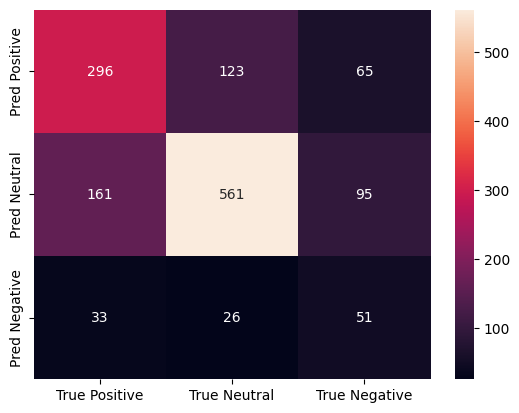

In [26]:
pipe = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,1), min_df=2, use_idf=True)),
                 ('clf', SVC(C=1000, gamma=1))])

x_train = text['train']+text['test']
x_train = lemmatizer(x_train, nb_nlp['medium'], True)
x_test = text['dev']

y_train = labels['train']+labels['test']
y_test = labels['dev']

pipe.fit(x_train, y_train)

prediction = pipe.predict(x_test)

cnf_mtrx = confusion_matrix(prediction, y_test, labels = ['Positive', 'Neutral', 'Negative'])

matrix = pd.DataFrame(cnf_mtrx, index = ['Pred Positive', 'Pred Neutral', 'Pred Negative'], columns = ['True Positive', 'True Neutral', 'True Negative'])

print('average accuracy;', pipe.score(x_test, y_test))
print('f1 weighted score:', f1_score(y_test, prediction, average='weighted'))
print(heatmap(matrix, annot=True, fmt='d'))

The resulting accuracy is at 64%. This seems low, and by looking at the confusion matrix, our main problem is the lack of negative labels. The low number of sentences with a negative label makes the model struggle at predicting them accurately.

Researchers have found that humans agree on the sentiment of a sentence about 80-85% of the time [1]. This means that if our model were to get an accuracy of 100%, then it would still only be about 80% accurate to a human. We should therefore accept accuracies of around 80% as being "as good as it gets". [3]

Therefore, a result equals to 64% is not actually negative or insufficient, and when you type sentences to the model it seems pretty accurate. There is a function to test this by yourself at the end of the notebook.

Back to our model: When looking at the confusion matrix, our model seems to be biased toward neutral data. To address this, we'll perform a gridsearch with balanced data and train a new model.

In [27]:
print(f'Number of positive sentiments:{len([x for x in labels_comb if x=="Positive"])}')
print(f'Number of neutral sentiments:{len([x for x in labels_comb if x=="Neutral"])}')
print(f'Number of negative sentiments:{len([x for x in labels_comb if x=="Negative"])}')

Number of positive sentiments:3515
Number of neutral sentiments:5387
Number of negative sentiments:1663


In [28]:
def balance(text:list, labels:list, bal_len:int)->tuple:
    """balances input text based on labels, text and labels must correspond such that text[0] has label[0]

    Args:
        text (list): list of sentences
        labels (list): list of labels
        bal_len (int): what lenght the balanced text and labels should have

    Returns:
        tuple: resulting text and labels
    """
    result_text = []
    result_labels = []

    n_positive = 0
    n_neutral = 0
    n_negative = 0

    # balance by looking for labels, 
    # adding corresponding text and labels to a list 
    # and count different types of labels

    for index in range(0, len(labels)):
        label = labels[index]
        if label == 'Positive':
            if n_positive < bal_len:
                result_text.append(text[index])
                result_labels.append(labels[index])
                n_positive += 1
        elif label == 'Neutral':
            if n_neutral < bal_len:
                result_text.append(text[index])
                result_labels.append(labels[index])
                n_neutral += 1
        elif label == 'Negative':
            if n_negative < bal_len:
                result_text.append(text[index])
                result_labels.append(labels[index])
                n_negative += 1
    return result_text, result_labels

In [29]:
bal_text_comb,bal_label_comb = balance(text_comb, labels_comb, 1663)

In [30]:
pipe = Pipeline([('vect', TfidfVectorizer()),
                 ('clf', SVC())])

params = {'clf__C': [0.001, 1, 1000],
           'clf__gamma': [0.1, 1, 10],
           'vect__ngram_range': [(1,1), (1,2), (1,3)],
           'vect__use_idf': [True, False],
           'vect__min_df': [0, 1, 2, 3]}

result2 = prim_grid(pipe, params, bal_text_comb, bal_label_comb)

progress
87.5% 
estimated time left: 2 minutes and 17 seconds


In [31]:
max_score = max(result2.keys())
print(f'score:{max_score} \nparameters:{result2[max_score]}')

Training with new parameters optimized for balanced data:

average accuracy; 0.5414599574769667
f1 weighted score: 0.5567911011964015
AxesSubplot(0.125,0.125;0.62x0.755)


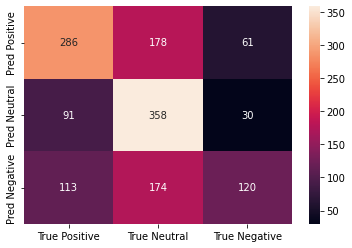

In [32]:
pipe2 = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,1), min_df=3, use_idf=False)),
                 ('clf', SVC(C=1, gamma=1))])

x_train = text['train']+text['test']
y_train = labels['train']+labels['test']

bal_x_train,bal_y_train = balance(x_train, y_train, 1452)

bal_x_train = lemmatizer(bal_x_train, nb_nlp['medium'], True)

x_test = text['dev']
x_test = lemmatizer(x_test, nb_nlp['medium'], True)
y_test = labels['dev']

pipe2.fit(bal_x_train, bal_y_train)

prediction = pipe2.predict(x_test)

cnf_mtrx = confusion_matrix(prediction, y_test, labels = ['Positive', 'Neutral', 'Negative'])

matrix = pd.DataFrame(cnf_mtrx, index = ['Pred Positive', 'Pred Neutral', 'Pred Negative'], columns = ['True Positive', 'True Neutral', 'True Negative'])

print('average accuracy;', pipe2.score(x_test, y_test))
print('f1 weighted score:', f1_score(y_test, prediction, average='weighted'))
print(heatmap(matrix, annot=True, fmt='d'))

We now get an accuracy of 54% and an F1 of 56%. While this is lower than before (64% & 63%), we are now better at predicting negative values. Although our F1 score is higher than our accuracy when using balanced data, it is still lower overall compared to using unbalanced data.

Now, we'll create a model that can be used in real-time to test on custom sentences! You'll be able to test it below.

In [33]:
pipe = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,1), min_df=2, use_idf=True)),
                 ('clf', SVC(C=1000, gamma=1))])

pipe.fit(text_comb, labels_comb)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=2, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_func

In [34]:
def pred_n_return(pipe:Pipeline, nlp:spacy, stop:bool, sentences:list=[]):
    """tries to predict the sentiment of a list of senteces if a list of sentences is given, 
    else it prompts for sentence until told to stop

    Args:
        pipe (Pipeline): a sklearn pipeline
        nlp (spacy): a language model
        stop (bool): if stopword removal should be implemented or not
        sentences (list): list of sentences that is empty by default
    """
    sent = ''
    if sentences==[]:
        while sent != ['stop']:
            sent = [input("Type 'stop' to stop \nType a sentence in norwegian:")]
            sent = lemmatizer(sent, nlp, stop)
            result = pipe.predict(sent)
            print(f"the sentence is {result[0]}")
    else:
        sent = lemmatizer(sentences, nlp, stop)
        result = pipe.predict(sent)
        for i in range(0, len(result)):
            print(sentences[i], 'is:', result[i])

Here is the function that you can use to test the prediction power of our model on Norwegian sentences.
This is useful as a real-world scenario, as also used for the following task.

In [35]:
# if empty wil prompt continusly for sentences
list_of_sent = ["Jeg elsker dette produktet!", "Støvsugeren er helt ok."]
pred_n_return(pipe, nb_nlp['medium'], True, list_of_sent)

Jeg elsker dette produktet! is: Positive
Støvsugeren er helt ok. is: Positive


#### Sources:
[1] https://mashable.com/archive/sentiment-analysis

[2] https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156?gi=8d6de1529edc

stopwords sourced from:  
https://searchcode.com/file/257516021/data/stopwords/stopwords-nb.txt/  
https://raw.githubusercontent.com/stopwords-iso/stopwords-no/master/stopwords-no.json


Dataset cloned from github: https://github.com/ltgoslo/norec_sentence

[3] Sentiment Analysis: High-impact Strategies - What You Need to Know: Definitions, Adoptions, Impact, Benefits, Maturity, Vendors

Kutuzov, A., Barnes, J., Velldal, E., Øvrelid, L., & Oepen, S. (2021). Large-Scale Contextualised Language Modelling for Norwegian. Proceedings of the 23rd Nordic Conference on Computational Linguistics (NoDaLiDa 2021).

Øvrelid, L., Mæhlum, P., Barnes, J., & Velldal, E. (2020). A Fine-grained Sentiment Dataset for Norwegian. Proceedings of the 12th Edition of the Language Resources and Evaluation Conference. Marseille, France, 2020.

# Task 3

## ML Story:
In this project, we train a convolutional neural network in the CIFAR-10 dataset using a VGG-like architecture.

Firstly, we have some initialization variables. The `TRAIN_METHOD`variable determines if the code shall run a full grid search, one single run, of simply load a model. `MODEL_FNAME` determines the name of the model to load. The target feature to be trained on can also be chosen here.

In [36]:
# constants
"""
TRAIN_METHOD options:
    single: do one training run of 100 epochs with preset parameters

    grid: grid search on predefined parameters with 30 epochs each,
          followed by a single 100 epoch train of the best model

    load: simply retrieve the model from MODEL_FNAME
"""
TRAIN_METHOD = "load"
MODEL_FNAME = "adam_unaugmented_balanced_64batch_100epochs.h5" # The file name to be loaded
TARGET_FEATURE = "ship" # Selects desired feature to classify (only has effect on the model if re-training the model)

Below are our helper functions and variables.

In [37]:
# Easy lookup for CIFAR-10 output labels
output_labels = {'airplane': 0,
                     'automobile': 1,
                     'bird': 2,
                     'cat': 3,
                     'deer': 4,
                     'dog': 5,
                     'frog': 6,
                     'horse': 7,
                     'ship': 8,
                     'truck': 9}

# Reverse lookup of corresponding label strings
label_strings = {v: k for k, v in output_labels.items()}

def pixel_scale(x):
    """
    scales pixel values from 0-255 to 0-1
    """
    return x.astype('float32') / 255.0

def process_image(file_content):
    """
    Converts an arbitrary image to a CIFAR-10-compatible format.
    
    img_input: data to feed into CIFAR-10
    img_array: pixel data (0-255) of the image suitable for displaying
    """
    # Load and resize the image to 32x32 pixels
    img = Image.open(io.BytesIO(file_content))
    
    # Correct image orientation
    try:
        img = ImageOps.exif_transpose(img)
    except (AttributeError, KeyError, IndexError):
        # If the image does not have EXIF data or the required tag, do nothing
        pass
    
    img_resized = img.resize((32, 32), Image.ANTIALIAS)

    # Convert the image to a NumPy array suitable for CIFAR-10
    img_array = np.array(img_resized.convert('RGB'))

    # Scale the image data
    img_scaled = img_array.astype("float32") / 255.0

    # Add an extra dimension to match the input shape of the ML model
    img_input = np.expand_dims(img_scaled, axis=0)

    # Make a prediction using the Keras model
    return img_input, img_array

def f1_score(precision, recall):
    """
    Returns the F1 score of a model given its precision and recall.
    """
    if precision == 0 or recall == 0:
        return 0
    else:
        f1_score = 2 * ((precision * recall) / (precision + recall))
        return f1_score

def model_file_string(optimizer, data_augmentation, balance_data, batch_size, gridsearch_epochs):
    """
    Given a set of hyperparameters, this function
    outputs a model file name appropriate for that combination.
    """
    str_optimizer = optimizer
    str_augmented = {True:"augmented", False:"unaugmented"}[data_augmentation]
    str_balanced = {True: "balanced", False: "unbalanced"}[balance_data]
    str_batchsize  = f"{batch_size}batch"
    str_epochs = f"{gridsearch_epochs}epochs"
    return f"{str_optimizer}_{str_augmented}_{str_balanced}_{str_batchsize}_{str_epochs}.h5"

def weighted_average_score(history, weights=None):
    """
    Returns a weighted average of the f1 score of a given training history.
    It favours newer runs.
    This is used in model selection during grid search
    to value training runs that show potential as they finish.
    """
    precisions = history.history['precision']
    recalls = history.history['recall']
    f1_scores = [f1_score(p, r) for p, r in zip(precisions, recalls)]

    if weights is None:
        weights = [(i+1)**2 for i in range(len(f1_scores))]
    return sum(x*y for x, y in zip(f1_scores, weights)) / sum(weights)


To select a candidate model, we have created a function weighted_average_score(), which calculates the F1 scores over the training run and sums them, weighted by the square of their index. We have not seen this approach used elsewhere, but we thought it would be a good way to select models that showed promise in their later stage of training.

Since we are classifying only a single feature, negative features outweigh positive ones nine-to-one. We will test if balancing positive and negative samples increases accuracy.

In [38]:
def balance_the_data(x_data, y_data, target_index):
    np.random.seed(SEED)
    
    # Separate positive and negative examples
    positive_indices = np.where(y_data == target_index)[0]
    negative_indices = np.where(y_data != target_index)[0]

    # Randomly sample negative examples
    sampled_negative_indices = np.random.choice(negative_indices, len(positive_indices), replace=False)

    # Combine positive and sampled negative examples
    balanced_indices = np.concatenate([positive_indices, sampled_negative_indices])

    # Shuffle the balanced dataset
    np.random.shuffle(balanced_indices)

    # Create the balanced data and labels
    x_balanced = x_data[balanced_indices]
    y_balanced = y_data[balanced_indices]
    
    return x_balanced, y_balanced

Below, we load and preprocess our data. After loading and applying preprocessing steps (optionally balancing our data), we split our data into train/val/test sets. The train set is used for fitting the model, the val set is used for hyperparameter optimization, and the test set is only used for evaluating final performance.

In [39]:
def load_and_prepare_dataset(target, to_balance_data):
    # Specify target feature
    target_index = output_labels[target]

    # load dataset
    (X1, y1), (X2, y2) = cifar10.load_data()
    # Concatenate the training and testing sets into a single dataset (this is just so we have finer control over the split fractions)
    X = np.concatenate([X1, X2])
    y = np.concatenate([y1, y2])
    
    # Split data into train, validation & test sets (creates an 80/10/10 split)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=SEED)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=SEED)

    # Balance the data using our function above
    if to_balance_data:
        X_train, y_train = balance_the_data(X_train, y_train, target_index)
        X_val, y_val = balance_the_data(X_val, y_val, target_index)
        X_test, y_test = balance_the_data(X_test, y_test, target_index)

    # Scale pixel values from 0-255 to 0-1
    X_train = pixel_scale(X_train)
    X_val = pixel_scale(X_val)
    X_test = pixel_scale(X_test)
    
    # Convert labels to binary (1 if target_class, 0 if not)
    y_train = (y_train == target_index).astype(int)
    y_val = (y_val == target_index).astype(int)
    y_test = (y_test == target_index).astype(int)

    return X_train, y_train, X_val, y_val, X_test, y_test

## 3 a)
Next up, we have our model. We created a CNN from the ground up, drawing upon the design of VGG [[2]](https://arxiv.org/abs/1409.1556v6):
* We use regular convolutional layers, with dimensions that fit the CIFAR-10 format (32x32 pixels, 3 channels). We use a kernel size of 3x3 and use an increasing amount of features the deeper the layers get, which is typical for CNNs. We use he_uniform as an initializer since it works well with our activation function, LeakyReLU. [[3]](https://arxiv.org/abs/1502.01852)
* We used fewer layers than what is possible. This is simply due to our compute budget.
* We also used batch normalization to improve training time, although as a bonus it also improves gradient flow and has a slight regularization effect.
* We used a LeakyReLU activation function instead of a regular ReLU to allow the model to keep learning weights with negative output values.
* We use MaxPoooling after every 2 layers, similar to VGG16.
* We also included dropout layers to make the model more resistand to overfitting. We increased the dropout rate in later layers, similar to the original paper on dropout: [[4]](https://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf?utm_content=buffer79b43&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer,)
* Since we are performing binary classification, we use a single output neruon with a sigmoid activation.
* Depending on our grid search parameters, we use either SGD or Adam as our optimizer.

In [40]:
# define cnn model
def define_model(optimizer="adam"):
    model = Sequential()
    # Feature detector
    model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(256, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))

    # Classifier
    model.add(Flatten())
    model.add(Dense(256, kernel_initializer='he_uniform'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid')) # Previously model.add(Dense(2, activation='softmax'))
    
    
    # compile model
    if optimizer == "sgd":
        optimizer = SGD()
    elif optimizer == "adam":
        optimizer = Adam()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])
    return model

In [41]:
# Function to create a plot of our model performance over time

def create_plot(history, fname, evaluation):
    fig = plt.figure(facecolor='white')

    # Adjust the spacing between subplots
    plt.subplots_adjust(hspace=0.4, left=0.15, right=0.55)

    # Add a large title with the filename
    title = plt.suptitle(fname, fontsize=16, y=1, x=0.05, ha='left')

    # Plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')

    # Plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')

    # Add the evaluation values as text
    accuracy, precision, recall, f1 = evaluation
    eval_text = f"Accuracy: {accuracy:.3f}\nPrecision: {precision:.3f}\nRecall: {recall:.3f}\nF1: {f1:.3f}"
    eval_textbox = plt.figtext(0.58, 0.85, eval_text, fontsize=12, ha='left', va='top', wrap=True, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    # Create a custom legend near the bottom right corner of the image with thinner lines
    custom_lines = [Line2D([0], [0], color='blue', lw=3.2),
                    Line2D([0], [0], color='orange', lw=3.2)]
    plt.legend(custom_lines, ['train', 'test'], loc='lower right', bbox_to_anchor=(1.57, 0.02))

    # Save plot to file
    plt.savefig(fname + '_plot.png', dpi=fig.dpi)

    # Show the plot
    plt.show()
    plt.close()
#summarize_diagnostics(history, MODEL_FILE, evaluation)

Here is the function for performing a single training run. We specify 4 hyperparameters:
* `optimizer`: Either Adam or Stochastic Gradient Descent (SGD). As we were unsure of which to use, we decided to test performance on both of these.
* `augment`: If True, the training set is augmented with variations of the original images (stretched and flipped slightly).
* `balance_data`: If True, the training set is reduced so that there is an equal amount of positive and negative examples.
* `batch_size`: Controls the amount of batches processed at a time.

In [42]:
def run_test_harness(optimizer="adam", augment=False, balance_data=True, batch_size=16, target=TARGET_FEATURE, model_file=MODEL_FNAME, train=TRAIN_METHOD, epochs=100):
    # set save folder
    folder_path = "cnn_models"
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    model_file = os.path.join(folder_path, model_file)
    # load dataset
    X_train, y_train, X_val, y_val, X_test, y_test = load_and_prepare_dataset(target, to_balance_data=balance_data)
    
    if augment:
        # Augment data by adding variations
        datagen = ImageDataGenerator(
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            validation_split=0.2
        )

        datagen.fit(X_train)

        # Create augmented trainset
        trainset = datagen.flow(X_train, y_train, batch_size=64)
        #steps = int(X_train.shape[0] / 64)

    
    # define model
    model = define_model(optimizer=optimizer)

    if train == "load":
        # load model
        model = load_model(model_file)
        history = None
    else:
        # Tensorboard is used to monitor training live
        tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=True)
        # fit model
        if augment:
            history = model.fit(trainset, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[tensorboard_callback], verbose=1)
        else:
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[tensorboard_callback], verbose=1)
        model.save(model_file)

    # evaluate model
    loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=1)
    
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Recall: {recall:.3f}')
    f1 = f1_score(precision, recall)
    print(f'F1: {f1:.3f}')

    evaluation = (accuracy, precision, recall, f1)
    
    if train != "load":
        create_plot(history, model_file, evaluation)

    return model, history, evaluation

Here, we perform a grid search to find a good combination of parameters, using a range of the parameters mentioned above.

Best combination: ('adam', False, True, 64)
Accuracy: 0.954
Recall: 0.972
F1: 0.955


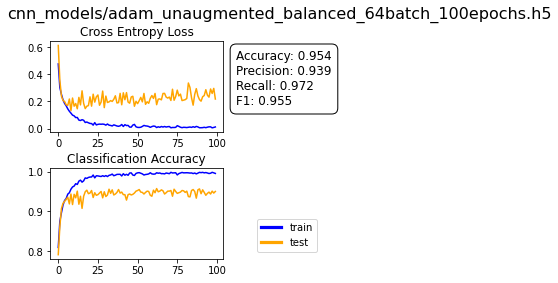

In [43]:
gridsearch_epochs = 30
full_train_epochs = 100

# Options: Grid search, single training run, load existing model
if TRAIN_METHOD == "grid":
    # Gridsearch
    optimizers = ["sgd", "adam"]
    data_augmentations = [True, False]
    balance_data = [True, False]
    batch_size = [16, 32, 64, 128]

    combinations = list(itertools.product(optimizers, data_augmentations, balance_data, batch_size))

    best_model = None
    best_score = 0
    best_combination = None

    for combination in combinations:
        clear_output(wait=True)
        optimizer, data_augmentation, balance_data, batch_size = combination
        model_file = model_file_string(optimizer, data_augmentation, balance_data, batch_size, gridsearch_epochs)
        model, history, evaluation = run_test_harness(optimizer, data_augmentation, balance_data, batch_size, model_file=model_file, epochs=gridsearch_epochs)
        print(f"^ Combination: {combination} (F1 {evaluation[3]:.3f}) (Weighted average score {weighted_average_score(history):.3f})")
        if best_model == None or weighted_average_score(history) > best_score:
            best_score = weighted_average_score(history)
            best_model = model
            best_combination = combination
            print("This was the best combination so far!")

    print(f"Best combination: {best_combination}")
    optimizer, data_augmentation, balance_data, batch_size = best_combination
    model_file = model_file_string(optimizer, data_augmentation, balance_data, batch_size, full_train_epochs)
    model, history, evaluation = run_test_harness(optimizer, data_augmentation, balance_data, batch_size, model_file=model_file, epochs=full_train_epochs)
elif TRAIN_METHOD == "single":
    optimizer, data_augmentation, balance_data, batch_size = ('adam', False, False, 64)
    model_file = model_file_string(optimizer, data_augmentation, balance_data, batch_size, full_train_epochs)
    model, history, evaluation = run_test_harness(optimizer, data_augmentation, balance_data, batch_size, model_file=model_file, epochs=full_train_epochs)
elif TRAIN_METHOD == "load":
    model, history, evaluation = run_test_harness(model_file=MODEL_FNAME, train="load")
else:
    print("Invalid train method!")

We get quite good scores, above 95%. The best combination appears to be an Adam optimizer, not augmenting the data, balancing it, and using a batch size of 64.

Because of our `weighted_average_score`, the model chose the unaugmented version since its scores were more stable. However, our manual testing revealed that when allowed to train for 100 epochs, the augmented model was able to match and surpass the unaugmented model, reaching an F1 score of 97%, almost 2% higher than the unaugmented model. This shows that a good function for candidate model selection is important, and is something we will be more aware of of moving forward.

Balanced data gives a higher score (approx. 2% higher, all else being equal)

As we see from the training run graph, the test set settles at a lower accuracy than the train set. This implies we have overfit our model, and further work would involve ways of mitigating this.

## 3 b)
Now, we'll use our model to classify a new image:

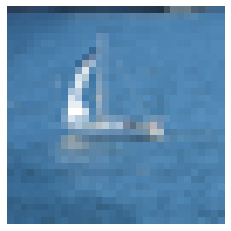

Prediction: 100.00% ship (SHIP)


In [44]:
def select_and_convert_image(model):
    # Create a FileUpload widget for uploading an image file
    upload = FileUpload(description='Upload Image', accepted_filetypes=".jpg,.jpeg,.png,.bmp,.gif,.webp", multiple=False)

    def on_upload(_):
        if upload.data:
            try:
                # Get the uploaded file's content
                file_content = upload.data[0]

                # Process the image and get the prediction
                img_input, img_array = process_image(file_content)
                prediction = model.predict(img_input)
                
                # Display the image using pyplot
                plt.imshow(img_array)
                plt.axis("off")
                print("Resized image to 32x32")
                display(plt.gcf())  # Display the current figure
                    
                class_label = TARGET_FEATURE.upper() if prediction >= 0.5 else f"NOT {TARGET_FEATURE.upper()}"
                print(f"Prediction: {float(prediction*100):.2f}% {TARGET_FEATURE} ({class_label})")
                plt.close()  # Close the figure to prevent displaying it again

                # Reset the FileUpload widget
                upload._counter = 0
                upload.data = []
            except Exception as e:
                print("Error processing image:", e)
                upload._counter = 0
                upload.data = []

    # Create a button for triggering the on_upload function
    process_button = Button(description="Process Image")
    process_button.on_click(on_upload)
    
    # Display the widgets without using a VBox
    display(upload)
    display(process_button)

# Call the function to select and convert an image
select_and_convert_image(model)

Our model correctly predicts a new image of a ship. If you have a model object in your runtime (you can get one by using `load_model()` or just running the cells in task 3 with `TRAIN_METHOD = "load"`), you can use the buttons above to try out your own images from your computer.

#### Real world approach in large scale

In order to have a real world test, we made a function that can predict images in a whole folder. It scans through the images in given folder, and creates a twin folder in the same directory with copies of all the images it believes is the target with \_ship appended to the folder name (e.g. `Holiday Photos_ship`). Each copy is has its prediction value added to the file name as a percentage (e.g. `pred097_ibizaharbour.JPG`). We encourage you to try it out on one of your personal folders, the results may be quite interesting:

In [45]:
def predict_folder(folder_path, threshold=0.5, recursive=True):
    if folder_path == "":
        return
    # quick fix for https://github.com/python-pillow/Pillow/issues/6809
    registered_extensions = {'.blp': 'BLP', '.bmp': 'BMP', '.dib': 'DIB', '.bufr': 'BUFR', '.cur': 'CUR', '.pcx': 'PCX', '.dcx': 'DCX', '.dds': 'DDS', '.ps': 'EPS', '.eps': 'EPS', '.fit': 'FITS', '.fits': 'FITS', '.fli': 'FLI', '.flc': 'FLI', '.ftc': 'FTEX', '.ftu': 'FTEX', '.gbr': 'GBR', '.gif': 'GIF', '.grib': 'GRIB', '.h5': 'HDF5', '.hdf': 'HDF5', '.png': 'PNG', '.apng': 'PNG', '.jp2': 'JPEG2000', '.j2k': 'JPEG2000', '.jpc': 'JPEG2000', '.jpf': 'JPEG2000', '.jpx': 'JPEG2000', '.j2c': 'JPEG2000', '.icns': 'ICNS', '.ico': 'ICO', '.im': 'IM', '.iim': 'IPTC', '.tif': 'TIFF', '.tiff': 'TIFF', '.jfif': 'JPEG', '.jpe': 'JPEG', '.jpg': 'JPEG', '.jpeg': 'JPEG', '.mpg': 'MPEG', '.mpeg': 'MPEG', '.mpo': 'MPO', '.msp': 'MSP', '.palm': 'PALM', '.pcd': 'PCD', '.pdf': 'PDF', '.pxr': 'PIXAR', '.pbm': 'PPM', '.pgm': 'PPM', '.ppm': 'PPM', '.pnm': 'PPM', '.psd': 'PSD', '.bw': 'SGI', '.rgb': 'SGI', '.rgba': 'SGI', '.sgi': 'SGI', '.ras': 'SUN', '.tga': 'TGA', '.icb': 'TGA', '.vda': 'TGA', '.vst': 'TGA', '.webp': 'WEBP', '.wmf': 'WMF', '.emf': 'WMF', '.xbm': 'XBM', '.xpm': 'XPM'}
    
    # Create a new folder for positive predictions
    output_folder = f"{folder_path}_{TARGET_FEATURE}"
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    failed_files = []
    traversed_files = 0
    found_positives = 0
    found_negatives = 0
    
    # total_files is used to give a progress indication to the user
    total_files = sum(len(files) for _, _, files in os.walk(folder_path))
    print("Total files:"+str(total_files))
    # Iterate over all files in the folder
    for root, _, files in os.walk(folder_path):
        print("hello!")
        for filename in files:
            
            file_path = os.path.join(root, filename)
            if any(filename.lower().endswith(ext) for ext in registered_extensions):
                try:
                    # Read the image file
                    with open(file_path, "rb") as f:
                        file_content = f.read()
                    
                    # Process the image and get the prediction
                    img_input, img_array = process_image(file_content)
                    prediction = model.predict(img_input)

                    if prediction >= threshold:
                        # Save the positive prediction to the new folder
                        shutil.copy(file_path, os.path.join(output_folder, f"pred{float(prediction*100):0>3.0f}_"+filename))
                        found_positives += 1
                    else:
                        found_negatives += 1
                    
                    # Clear output for each processed image
                    print(f"Processed file {filename} ({traversed_files} of {total_files})")
                    print(f"(Prediction: {float(prediction*100):.2f}% {TARGET_FEATURE})")
                    print(f"Found {found_positives} {TARGET_FEATURE}(s)")
                    clear_output(wait=True)

                except Exception as e:
                    print(f"Error processing file {filename}: {e}")
                    clear_output(wait=True)
                    failed_files.append(filename)
                traversed_files += 1
        # Credit to https://stackoverflow.com/a/40349464
        if not recursive:
            break

    clear_output(wait=True)
    print(f"Finished classifying {traversed_files} {TARGET_FEATURE}")
    print(f"Found {found_positives} positives, {found_negatives} negatives")
    print(f"Saved to {output_folder}")
    if any(failed_files):
        print(f"Warning: Failed to process {len(failed_files)} files: {failed_files}")

# Call the function to process a folder
folder_path = r""
predict_folder(folder_path, recursive=True)

Finished classifying 226 ship
Found 48 positives, 178 negatives
Saved to C:\ML_folder_ship


## Performance in a real world-scenario
Lastly, we tried testing our model in a real-world scenario. We tested the model on a collection of 226 photos taken by one of our team members during a previous summer holiday. We reviewed these images manually and found 12 images containing ships, and 214 images without ships. Below is a confusion matrix and scores for our model on these images.

Since there are arguably infinitely more objects that the ones contained in CIFAR-10, we can expect our model to perform worse on this real-world test.

### Real world test results

|               | Actual Ship | Actual No Ship |
|---------------|-------------|----------------|
| Predicted Ship|      6      |       42       |
| Predicted No Ship |  6      |      172       |

|               |             |
|---------------|-------------|
|               |             |
| Accuracy:     |78.76%       |
| F1:           |18.18%       |
| Recall:       |50%          |

As we can see, the model performs predictably worse in the real world due to the different nature of the images, which can be harder to identify. When presented with a ship from our collaborator's folder, it only has a 50% chance of recognising it.

## Conclusion
Our model achieves a high test accuracy on the CIFAR-10 dataset. However, as we can expect, it does not perform well in the real world. This is to be expected. Overall, we are satisfied with our model performance, considering the limited classes in the training set.

#### Sources:
[1] Machine learning Mastery, how to develop a CNN from scratch. Available at https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

[2] Simonyan, K. and Zisserman, A., 2014. Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556. Available at https://arxiv.org/abs/1409.1556v6

[3] He, K., Zhang, X., Ren, S. and Sun, J., 2015. Delving deep into rectifiers: Surpassing human-level performance on imagenet classification. In Proceedings of the IEEE international conference on computer vision (pp. 1026-1034). Available at https://arxiv.org/abs/1409.1556v6

[4] Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I. and Salakhutdinov, R., 2014. Dropout: a simple way to prevent neural networks from overfitting. The journal of machine learning research, 15(1), pp.1929-1958. Available at https://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf